In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Unemployment in India.csv')
df.rename(columns={' Date': 'Date', 'Region': 'State'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   State                                     740 non-null    object        
 1   Date                                      740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None

Missing values:
 State                                       28
Date                                        28
 Freq

In [5]:
print("Unique States:", df['State'].nunique())
print("Date Range:", df['Date'].min(), "to", df['Date'].max())

Unique States: 28
Date Range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00


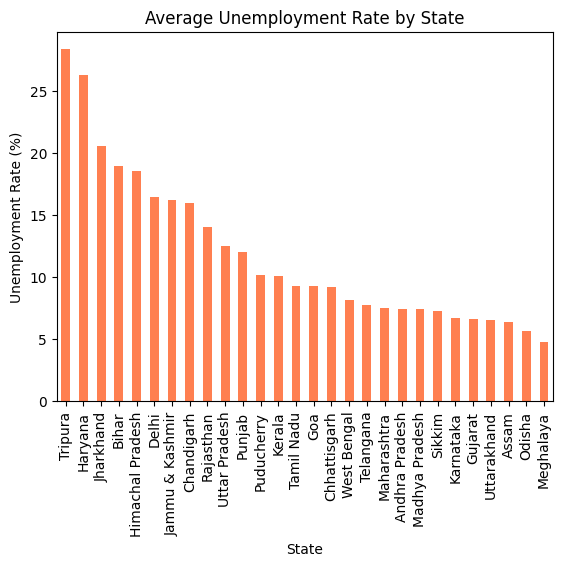

In [6]:
# Average unemployment by state
statewise_avg = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
# Plot average unemployment rate by state
statewise_avg.plot(kind='bar', color='coral')
plt.title('Average Unemployment Rate by State')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

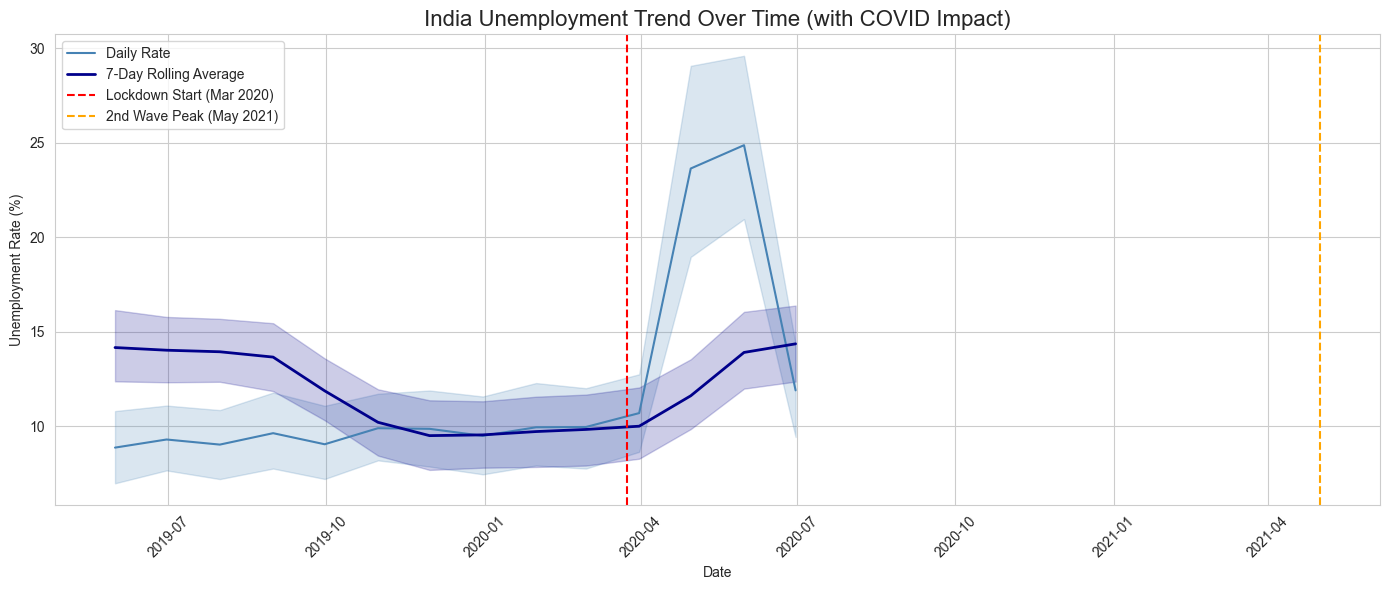

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))

# Plot daily unemployment rate
sns.lineplot(data=df, x='Date', y=' Estimated Unemployment Rate (%)', label='Daily Rate', color='steelblue')

# Plot 7-day rolling average
df['Rolling_Avg'] = df[' Estimated Unemployment Rate (%)'].rolling(window=7).mean()
sns.lineplot(data=df, x='Date', y='Rolling_Avg', label='7-Day Rolling Average', color='darkblue', linewidth=2)

# Add vertical lines for COVID events
plt.axvline(pd.to_datetime('2020-03-24'), color='red', linestyle='--', label='Lockdown Start (Mar 2020)')
plt.axvline(pd.to_datetime('2021-05-01'), color='orange', linestyle='--', label='2nd Wave Peak (May 2021)')

plt.title('India Unemployment Trend Over Time (with COVID Impact)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

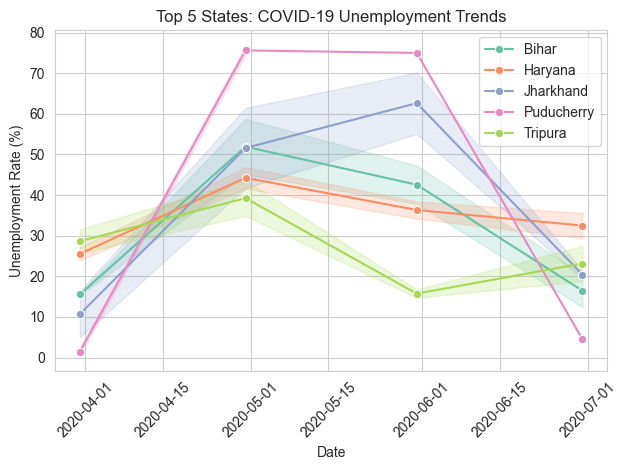

In [12]:
# Step 6: Top 5 States During COVID-19
covid_df = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')]
top_states = covid_df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5).index
top_df = covid_df[covid_df['State'].isin(top_states)]

sns.lineplot(data=top_df, x='Date', y=' Estimated Unemployment Rate (%)', hue='State', marker='o', palette='Set2')
plt.title('Top 5 States: COVID-19 Unemployment Trends')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

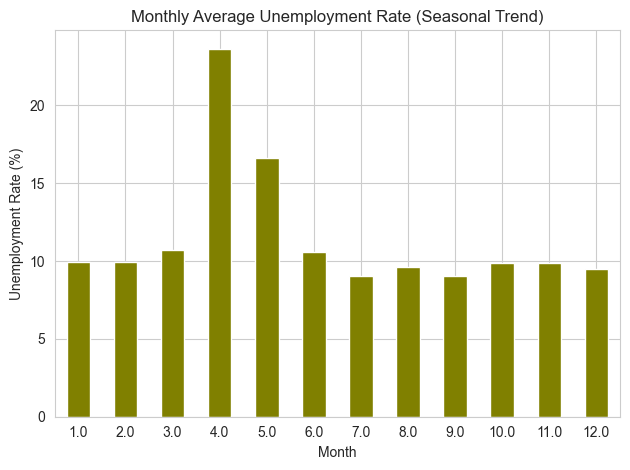

In [13]:
# Step 7: Seasonal Trend Analysis with Monthly Average
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

monthly_avg.plot(kind='bar', color='olive')
plt.title('Monthly Average Unemployment Rate (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()